# **FAKE NEWS DETECION**

> **AIM OF THE PROJECT :**
>             *The aim of this project is to develop a machine learning model for detecting fake news. Given a dataset containing news articles labeled as either real or fake, the goal is to train a model that can accurately classify news articles into these two categories. By achieving this aim, the project aims to contribute to the effort of combating the spread of misinformation and fake news in media platforms.*

> **OBJECTIVES :**
> * **Data Collection and Exploration**   Gather a labeled dataset of news articles and explore its distribution and characteristics.
> * **Data Preprocessing**   Clean, tokenize, and normalize the text data to prepare it for feature engineering.
> * **Feature Engineering**   Convert the text data into numerical representations suitable for machine learning algorithms.
> * **Model Development**   Train and tune multiple machine learning models to classify news articles as real or fake.
> * **Model Evaluation**   Assess the performance of trained models using appropriate evaluation metrics.
> * **Error Analysis**   Conduct a thorough analysis of model errors to identify patterns and common misclassifications, aiming to improve model performance through targeted adjustments.

In [1]:
import numpy as np
import pandas as pd
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
import warnings
warnings.filterwarnings('ignore')

# **1.** **DATA EXPLORATION**

In [2]:
import csv
df=pd.read_csv('/kaggle/input/my-dataset-1/news.csv')


In [3]:
df.shape

(6335, 4)

In [4]:
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [5]:
df.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB


In [7]:
df.describe(include = object)

,title,text,label
count,6335,6335,6335
unique,6256,6060,2
top,OnPolitics | 's politics blog,"Killing Obama administration rules, dismantlin...",REAL
freq,5,58,3171


In [10]:
df['label'].value_counts()

label
REAL    3171
FAKE    3164
Name: count, dtype: int64

In [11]:
labels=df.label
labels.head(10)

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
5    FAKE
6    FAKE
7    REAL
8    REAL
9    REAL
Name: label, dtype: object

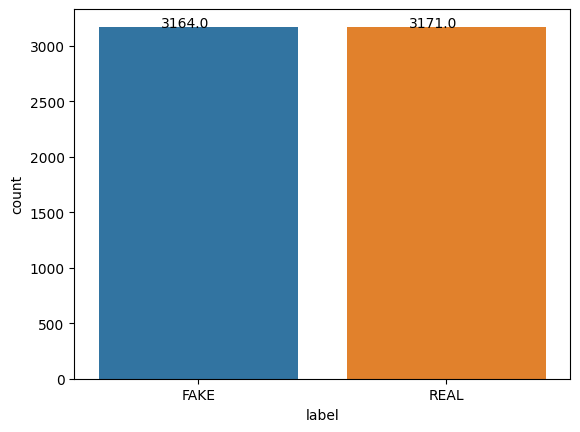

In [12]:
ax=sns.countplot(x ='label', data = df)
for p in ax.patches:
   ax.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))

# **2.** **DATA PRE-PROCESSING**

In [8]:
df['text'].isnull().sum()

0

In [9]:
df.fillna('', inplace=True)

In [13]:
from tqdm import tqdm
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,ImageColorGenerator
import string
from nltk.stem import WordNetLemmatizer

In [14]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [15]:
df["text"] = df["text"].apply(wordopt)
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,daniel greenfield a shillman journalism fello...,FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,u s secretary of state john f kerry said mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,kaydee king kaydeeking november the le...,FAKE
4,875,The Battle of New York: Why This Primary Matters,it s primary day in new york and front runners...,REAL
5,6903,"Tehran, USA",i m not an immigrant but my grandparents a...,FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,share this baylee luciani left screenshot o...,FAKE
7,95,‘Britain’s Schindler’ Dies at 106,a czech stockbroker who saved more than jewis...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,hillary clinton and donald trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,iranian negotiators reportedly have made a las...,REAL


In [16]:
df['text'].str.replace('[{}]'.format(string.punctuation), '')
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,daniel greenfield a shillman journalism fello...,FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,u s secretary of state john f kerry said mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,kaydee king kaydeeking november the le...,FAKE
4,875,The Battle of New York: Why This Primary Matters,it s primary day in new york and front runners...,REAL


In [17]:
text = df['text'].str.lower()
text.head()

0    daniel greenfield  a shillman journalism fello...
1    google pinterest digg linkedin reddit stumbleu...
2    u s  secretary of state john f  kerry said mon...
3      kaydee king   kaydeeking  november    the le...
4    it s primary day in new york and front runners...
Name: text, dtype: object

In [18]:
all_spam = df['text'].str.split(' ')
all_spam.head()

0    [daniel, greenfield, , a, shillman, journalism...
1    [google, pinterest, digg, linkedin, reddit, st...
2    [u, s, , secretary, of, state, john, f, , kerr...
3    [, , kaydee, king, , , kaydeeking, , november,...
4    [it, s, primary, day, in, new, york, and, fron...
Name: text, dtype: object

In [19]:
all_spam_cleaned = []

for text in all_spam:
    text = [x.strip(string.punctuation) for x in text]
    all_spam_cleaned.append(text)

all_spam_cleaned[0]

text_spam = [" ".join(text) for text in all_spam_cleaned]
final_text_spam = " ".join(text_spam)

# **3. FEATURE ENGINEERING**

* Created word clouds to visualize the most frequent words in both titles and texts.
* Extracted top words and bigrams using CountVectorizer.
* Converted text data into TF-IDF vectors for training and testing.

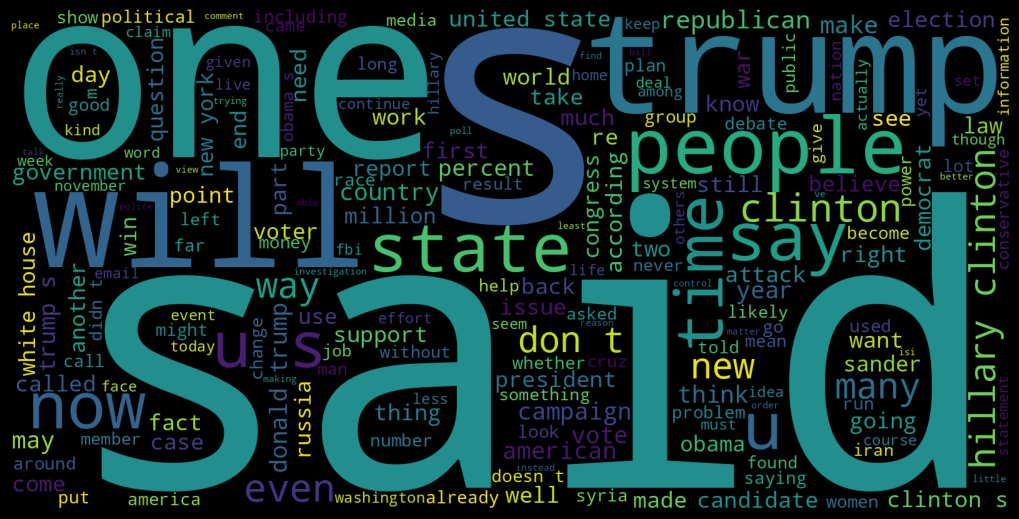

In [20]:
text = final_text_spam
wordcloud = WordCloud(width=1600, height=800).generate(text)
plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [21]:
text = df['title'].str.lower()
text.head()

0                         you can smell hillary’s fear
1    watch the exact moment paul ryan committed pol...
2          kerry to go to paris in gesture of sympathy
3    bernie supporters on twitter erupt in anger ag...
4     the battle of new york: why this primary matters
Name: title, dtype: object

In [22]:
all_spam = df['title'].str.split(' ')
all_spam.head()

0                   [You, Can, Smell, Hillary’s, Fear]
1    [Watch, The, Exact, Moment, Paul, Ryan, Commit...
2    [Kerry, to, go, to, Paris, in, gesture, of, sy...
3    [Bernie, supporters, on, Twitter, erupt, in, a...
4    [The, Battle, of, New, York:, Why, This, Prima...
Name: title, dtype: object

In [23]:
all_spam_cleaned = []

for text in all_spam:
    text = [x.strip(string.punctuation) for x in text]
    all_spam_cleaned.append(text)

all_spam_cleaned[0]

text_spam = [" ".join(text) for text in all_spam_cleaned]
final_text_spam = " ".join(text_spam)

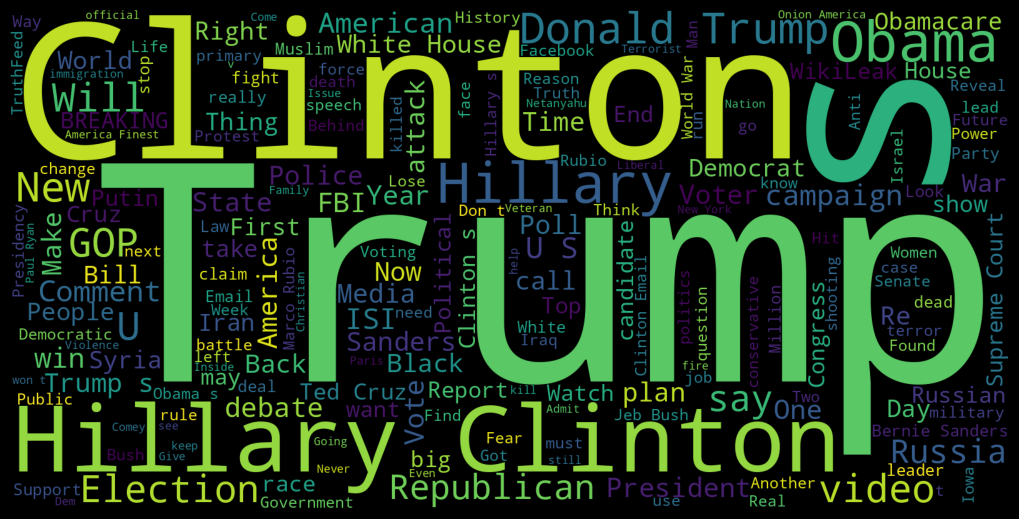

In [24]:
text = final_text_spam
wordcloud = WordCloud(width=1600, height=800).generate(text)
plt.figure(figsize=(10,10), facecolor='k')
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [25]:
def get_top_n_words(corpus, n=None):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [26]:
x_text=df['title'].tolist()
x=x_text[10:15]

In [27]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english')
countvectorizer = CountVectorizer(analyzer= 'word', stop_words='english')

tfidf_train=tfidf_vectorizer.fit_transform(x) 

count_wm = countvectorizer.fit_transform(x)
tfidf_wm = tfidf_vectorizer.fit_transform(x)
count_tokens = countvectorizer.get_feature_names_out()
tfidf_tokens = tfidf_vectorizer.get_feature_names_out()
df_countvect = pd.DataFrame(data = count_wm.toarray(),columns = count_tokens)
df_tfidfvect = pd.DataFrame(data = tfidf_wm.toarray(),columns = tfidf_tokens)
print("Count Vectorizer\n")
print(df_countvect)
print("\nTD-IDF Vectorizer\n")
print(df_tfidfvect)

Count Vectorizer

   10  2016  26  america  campaign  clinton  clintons  cruz  delegate  donald  \
0   0     0   0        0         1        1         1     0         0       0   
1   0     0   0        0         0        0         0     0         1       1   
2   0     1   1        0         0        0         0     0         0       0   
3   1     0   0        1         0        0         0     0         0       0   
4   0     0   0        0         0        0         0     1         0       0   

   ...  takes  tech  today  trump  video  war  ways  weak  world  worse  
0  ...      0     0      0      0      0    0     0     0      0      0  
1  ...      0     0      0      1      0    0     0     1      0      1  
2  ...      0     1      1      0      1    0     0     0      0      0  
3  ...      0     0      0      0      0    1     1     0      1      0  
4  ...      1     0      0      1      0    0     0     0      0      0  

[5 rows x 36 columns]

TD-IDF Vectorizer

        

In [28]:
x_train,x_test,y_train,y_test=train_test_split(df['text'], labels, test_size=0.3, random_state=7)

In [29]:
tfidf_vectorizer=TfidfVectorizer(stop_words='english', max_df=0.7)

tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)
print('TF-IDF VECTORIZER FOR TRAINED DATA\n')
print(tfidf_train)
print('\nTF-IDF VECTORIZER FOR TESTED DATA\n')
print(tfidf_test)

TF-IDF VECTORIZER FOR TRAINED DATA

  (0, 43904)	0.018315847467265473
  (0, 16059)	0.0263863294058777
  (0, 25273)	0.01731755778546683
  (0, 41396)	0.01937737022615556
  (0, 29836)	0.02305018537867541
  (0, 29280)	0.01954450700262361
  (0, 54083)	0.014056655724628568
  (0, 24093)	0.044724909461666996
  (0, 16050)	0.03263174279456294
  (0, 11879)	0.020841829354597986
  (0, 43650)	0.02375170943053865
  (0, 27796)	0.02151199255260575
  (0, 608)	0.03663751424748607
  (0, 31536)	0.01790112894223634
  (0, 14111)	0.013295544822360587
  (0, 13299)	0.02229540076651543
  (0, 25436)	0.044724909461666996
  (0, 10639)	0.025553705299527895
  (0, 46364)	0.034101509092562286
  (0, 37015)	0.019844988449991628
  (0, 25791)	0.022782308893070976
  (0, 8527)	0.019055666462611056
  (0, 49590)	0.024321590593815837
  (0, 38018)	0.030129025969517356
  (0, 28286)	0.019161111624053838
  :	:
  (4433, 28712)	0.09485380841192081
  (4433, 205)	0.0453635032758838
  (4433, 30018)	0.08270462277260318
  (4433, 28414)	0.

# **4.** **MODEL DEVELOPMENT AND EVALUATION**

* Implemented three machine learning classifiers: Passive Aggressive Classifier, Naive Bayes Classifier, and Random Forest Classifier.
* Trained each classifier using TF-IDF vectors obtained from the text data.
* Evaluated each classifier's performance using accuracy, precision, recall, and F1-score.
* Plotted confusion matrices to visualize the performance of each classifier.

In [35]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score,recall_score, confusion_matrix,f1_score,precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from mlxtend.plotting import plot_confusion_matrix
from sklearn.naive_bayes import GaussianNB

**PASSIVE AGGRESSIVE CLASSIFIER**

In [36]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac=pac.fit(tfidf_train,y_train)
y_pred=pac.predict(tfidf_test)
xscore=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(xscore*100,2)}%')

Accuracy: 92.43%


In [37]:
print(classification_report(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='REAL'))
print('F1 score:',metrics.f1_score(y_test, y_pred,pos_label='REAL'))
print('Recall:',metrics.recall_score(y_test, y_pred,pos_label='REAL'))

              precision    recall  f1-score   support

        FAKE       0.92      0.93      0.93       974
        REAL       0.92      0.92      0.92       927

    accuracy                           0.92      1901
   macro avg       0.92      0.92      0.92      1901
weighted avg       0.92      0.92      0.92      1901

Precision: 0.9241603466955579
F1 score: 0.9221621621621621
Recall: 0.9201725997842503


[[904  70]
 [ 74 853]]


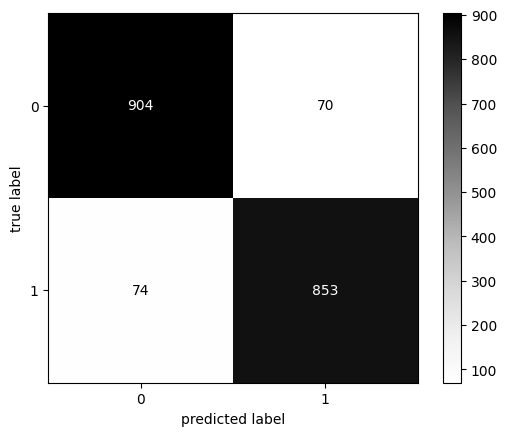

In [38]:
cf=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(cf)
binary1 =cf
ax = plot_confusion_matrix(conf_mat=binary1,colorbar=True,cmap='Greys',fontcolor_threshold=0.4)
plt.show()

**NAIVE BAYES CLASSIFIER**

In [46]:
clf = GaussianNB()
clf.fit(tfidf_train.toarray(),y_train)
y_pred = clf.predict(tfidf_test.toarray())
yscore=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 80.59%


[[742 232]
 [137 790]]


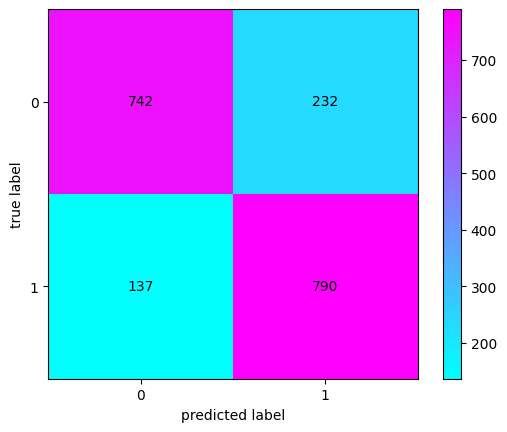

In [47]:
cf=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(cf)
binary1 =cf
ax = plot_confusion_matrix(conf_mat=binary1,colorbar=True,cmap='cool',fontcolor_threshold=3)
plt.show()

In [48]:
print(classification_report(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='REAL'))
print('F1 score:',metrics.f1_score(y_test, y_pred,pos_label='REAL'))
print('Recall:',metrics.recall_score(y_test, y_pred,pos_label='REAL'))


              precision    recall  f1-score   support

        FAKE       0.84      0.76      0.80       974
        REAL       0.77      0.85      0.81       927

    accuracy                           0.81      1901
   macro avg       0.81      0.81      0.81      1901
weighted avg       0.81      0.81      0.81      1901

Precision: 0.7729941291585127
F1 score: 0.8106721395587481
Recall: 0.8522114347357066


 **RANDOM FOREST CLASSIFIER**

In [49]:
rfc = RandomForestClassifier()
rfc = rfc.fit(tfidf_train,y_train)
y_pred = rfc.predict(tfidf_test)
zscore=accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(zscore*100,2)}%')

Accuracy: 89.9%


[[882  92]
 [100 827]]


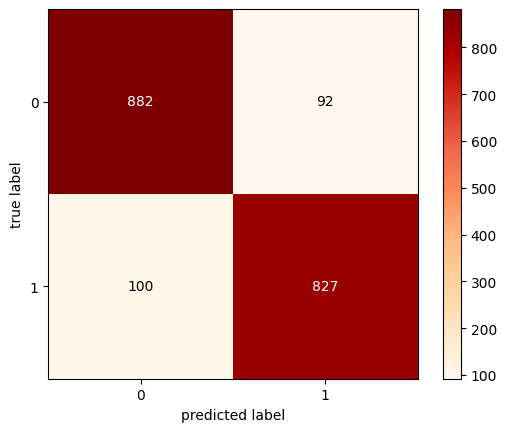

In [50]:
cf=confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(cf)
binary1 =cf
ax = plot_confusion_matrix(conf_mat=binary1,colorbar=True,cmap='OrRd',fontcolor_threshold=0.4)
plt.show()

In [51]:
print(classification_report(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, pos_label='REAL'))
print('F1 score:',metrics.f1_score(y_test, y_pred,pos_label='REAL'))
print('Recall:',metrics.recall_score(y_test, y_pred,pos_label='REAL'))

              precision    recall  f1-score   support

        FAKE       0.90      0.91      0.90       974
        REAL       0.90      0.89      0.90       927

    accuracy                           0.90      1901
   macro avg       0.90      0.90      0.90      1901
weighted avg       0.90      0.90      0.90      1901

Precision: 0.8998911860718172
F1 score: 0.895991332611051
Recall: 0.8921251348435815


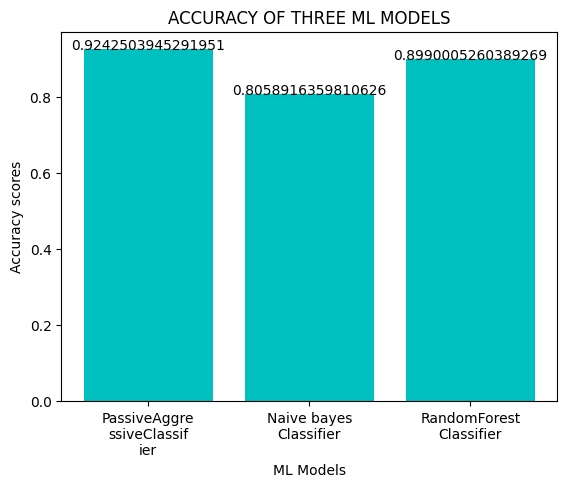

In [52]:
from textwrap import wrap
x=['PassiveAggressiveClassifier','Naive bayes Classifier','RandomForestClassifier']
y=[xscore,yscore,zscore]
x = [ '\n'.join(wrap(l, 12)) for l in x ]
plt.bar(x,y,color='c')
for i in range(len(x)):
    plt.text(i, y[i], y[i], ha = 'center')
plt.title("ACCURACY OF THREE ML MODELS")
plt.ylabel("Accuracy scores")
plt.xlabel("ML Models")
plt.show()

> ***the Passive Aggressive Classifier achieved the highest accuracy of 92.43%, followed by the Random Forest Classifier with an accuracy of 89.9%, and the Naive Bayes Classifier with an accuracy of 80.59%. These results indicate that the Passive Aggressive Classifier is the most effective in detecting fake news based on the given dataset.***

**TOP 10 IMPORTANT FEATURES**

In [53]:
# Feature Importance Analysis
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest classifier
rfc = RandomForestClassifier()

# Fit the model on the training data
rfc.fit(tfidf_train, y_train)

# Get feature importances
feature_importances = rfc.feature_importances_

# Get feature names
feature_names = tfidf_vectorizer.get_feature_names_out()

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top 10 most important features
print("Top 10 Most Important Features:")
print(feature_importance_df.head(10))


Top 10 Most Important Features:
          Feature  Importance
42319        said    0.014990
43508         sen    0.008900
40740  republican    0.007854
33703       obama    0.006354
33903     october    0.005692
6996   candidates    0.005029
20306         gop    0.004769
33241  nomination    0.004752
6936     campaign    0.004648
48271         tax    0.004155


# **5. ERROR ANALYSIS**

In [54]:
# Error Analysis
from sklearn.metrics import confusion_matrix

# Predict on the test data
y_pred = rfc.predict(tfidf_test)

# Get the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Identify misclassified instances
misclassified_indices = np.where(y_pred != y_test)[0]

# Display a sample of misclassified instances along with their predicted and actual labels
print("\nSample of Misclassified Instances:")
for idx in misclassified_indices[:5]:  # Displaying the first 5 misclassified instances
    print("Predicted Label:", y_pred[idx])
    print("Actual Label:", y_test.iloc[idx])
    print("Text:", x_test.iloc[idx])
    print()


Confusion Matrix:
[[874 100]
 [ 91 836]]

Sample of Misclassified Instances:
Predicted Label: FAKE
Actual Label: REAL
Text: the federal government must make regular interest payments on the money it has borrowed to finance past deficits   that is  on the national debt held by the public   the congressional budget office has estimated that the federal government s net interest payments on that debt will total   billion in the  fiscal year  working americans end up having to foot that very large bill to varying degrees based on each individual taxpayer s adjusted gross income   click here to see your share of the federal debt   and the cbo expects that this challenge will accelerate over the next decade  current interest rates are low by historical standards and higher interest rates means higher interest payments  it s projected that net interest costs will more than triple over the next decade  reaching   billion in    these numbers pose a real threat  the cbo has issued warnings about

# **INFERENCE**

> ***The project focuses on leveraging machine learning techniques to analyze sentiment in social media data. It aims to develop a robust model capable of accurately classifying customer feedback into positive, negative, or neutral sentiments. By achieving this goal, businesses can gain valuable insights into public opinion, improve customer satisfaction, and make informed decisions regarding their products or services. The project encompasses various stages, including data collection, preprocessing, model development, evaluation, error analysis, and potential deployment. Through this comprehensive approach, the project aims to provide a scalable solution for sentiment analysis that can be adapted to various industries and domains.***